# Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime
import statsmodels.api as sm
from fbprophet import Prophet

Importing plotly failed. Interactive plots will not work.


# Case 1

In [22]:
df = pd.read_csv('TFP.csv')

In [23]:
df

,isocode,year,rtfpna
0,USA,1950,0.617148
1,USA,1951,0.629588
2,USA,1952,0.638451
3,USA,1953,0.651858
4,USA,1954,0.646179
...,...,...,...
181,MEX,2007,1.013673
182,MEX,2008,0.991548
183,MEX,2009,0.915879
184,MEX,2010,0.941604


In [31]:
df_usa = df[mask1].drop(columns=['isocode'])
df_can = df[mask2].drop(columns=['isocode'])
df_mex = df[mask3].drop(columns=['isocode'])

In [24]:
mask1 = df['isocode'] == 'USA'
mask2 = df['isocode'] == 'CAN'
mask3 = df['isocode'] == 'MEX'

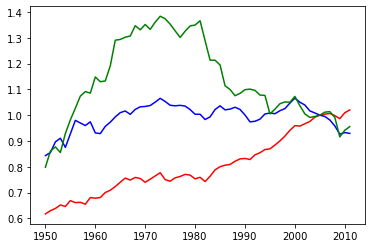

In [32]:
plt.plot(df_usa['year'], df_usa['rtfpna'], 'r-', df_can['year'], df_can['rtfpna'], 'blue', df_mex['year'], df_mex['rtfpna'], 'green')
plt.show()

## Forecast

In [33]:
df_usa = df_usa.rename({'year':'ds','rtfpna':'y'},axis=1)
df_can = df_can.rename({'year':'ds','rtfpna':'y'},axis=1)
df_mex = df_mex.rename({'year':'ds','rtfpna':'y'},axis=1)

### USA

In [36]:
df_usa.ds = pd.to_datetime(df_usa.ds, format='%Y')

In [52]:
type(df_usa.ds[0])

pandas._libs.tslibs.timestamps.Timestamp

In [50]:
df_usa.ds = pd.DatetimeIndex(df_usa.ds)

In [54]:
pd.set_option('display.max_rows', 63)

In [55]:
df_usa

,ds,y
0,1950-01-01,0.617148
1,1951-01-01,0.629588
2,1952-01-01,0.638451
3,1953-01-01,0.651858
4,1954-01-01,0.646179
5,1955-01-01,0.668773
6,1956-01-01,0.661000
7,1957-01-01,0.662165
8,1958-01-01,0.654813
9,1959-01-01,0.680680


In [58]:
model = Prophet()
model.fit(df_usa)

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


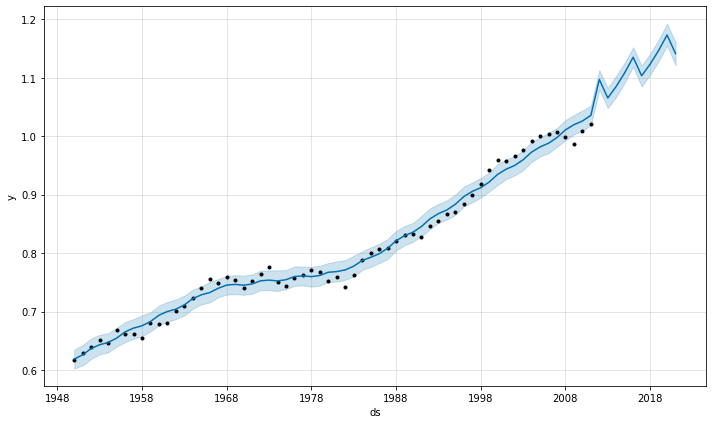

In [60]:
future = model.make_future_dataframe(periods=10,freq='Y')
forecast = model.predict(future)
forecast_plot = model.plot(forecast)
#components_plot_forecast = model.plot_components(forecast)

In [39]:
forecast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,1950-01-01,0.199012,0.600812,0.634553,0.199012,0.199012,0.419599,0.419599,0.419599,0.419599,0.419599,0.419599,0.0,0.0,0.0,0.618611
1,1951-01-01,0.206123,0.609234,0.641968,0.206123,0.206123,0.419816,0.419816,0.419816,0.419816,0.419816,0.419816,0.0,0.0,0.0,0.625940
2,1952-01-01,0.213234,0.619470,0.652796,0.213234,0.213234,0.423444,0.423444,0.423444,0.423444,0.423444,0.423444,0.0,0.0,0.0,0.636678
3,1953-01-01,0.220365,0.625847,0.659211,0.220365,0.220365,0.422795,0.422795,0.422795,0.422795,0.422795,0.422795,0.0,0.0,0.0,0.643160
4,1954-01-01,0.227476,0.630512,0.663562,0.227476,0.227476,0.419599,0.419599,0.419599,0.419599,0.419599,0.419599,0.0,0.0,0.0,0.647075
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67,2016-12-31,0.673013,1.085980,1.121532,0.668381,0.677630,0.430472,0.430472,0.430472,0.430472,0.430472,0.430472,0.0,0.0,0.0,1.103484
68,2017-12-31,0.682516,1.106164,1.142060,0.676789,0.688352,0.440885,0.440885,0.440885,0.440885,0.440885,0.440885,0.0,0.0,0.0,1.123401
69,2018-12-31,0.692019,1.129081,1.164992,0.684931,0.699195,0.454661,0.454661,0.454661,0.454661,0.454661,0.454661,0.0,0.0,0.0,1.146680
70,2019-12-31,0.701522,1.155277,1.192867,0.693166,0.710088,0.471773,0.471773,0.471773,0.471773,0.471773,0.471773,0.0,0.0,0.0,1.173295
